In [3]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import numpy as np
import cv2

matplotlib.rcParams['figure.figsize'] = (10.0, 7.5)

(X_train, y_train), (X_test, y_test) = mnist.load_data() 

koka = cv2.imread('koka.jpg', 0)

koka = cv2.resize(koka, (0,0), fx=0.05, fy=0.05)

plt.imshow(koka, cmap=cm.Greys_r)
plt.show()

/home/king/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/king/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/king/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/king/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

<Figure size 1000x750 with 1 Axes>

In [84]:
def main(im, im_filter):
    
    width = im.shape[0]
    height = im.shape[1]

    imC = np.zeros((width-2, height-2))

    for row in range(1, width-1):
        for col in range(1,height-1):
            for i in range(len(im_filter[0])):
                for j in range(len(im_filter)):
                    imC[row-1][col-1] += im[row-1+i][col-1+j]*im_filter[i][j]
            if imC[row-1][col-1] > 255:
                imC[row-1][col-1] == 255
            elif imC[row-1][col-1] < 0:
                imC[row-1][col-1] = 0
                
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(15.0,11.25))

    ax1.imshow(im, cmap=cm.Greys_r)
    
    ax2.imshow(imC/255, cmap=cm.Greys_r)
    

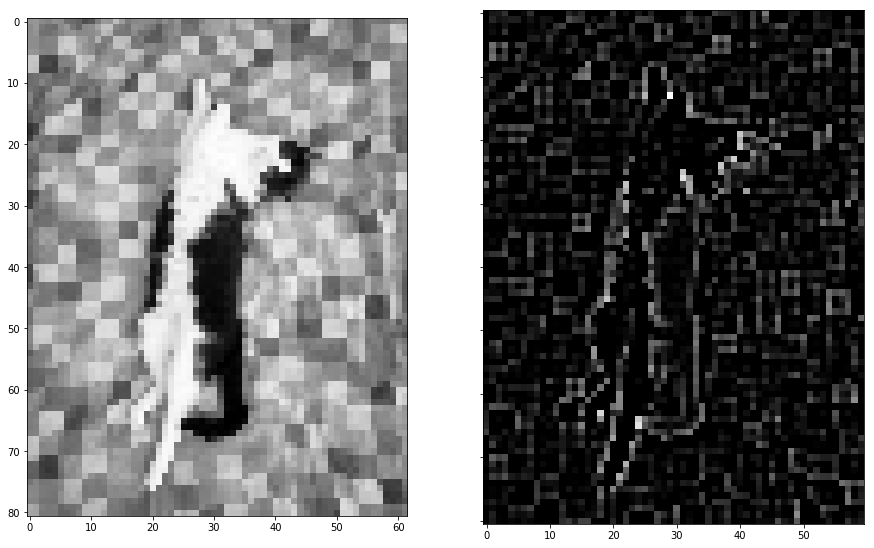

In [85]:
edges = [[1,1,1], [1,-8,1], [1,1,1]]

main(koka, edges)

In [9]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

# Standaryzacja Cech - Feature Standarization

In [41]:
koka = cv2.imread('koka.jpg', 1)
koka = cv2.resize(koka, (0,0), fx=0.1, fy=0.1)
# koka = cv2.resize(koka, (0,0), fx=0.015, fy=0.015)
print(koka.shape)

(416, 312, 3)


In [42]:
data = img_to_array(koka, 'channels_first')

expand_dims(data, 0).shape

(1, 3, 416, 312)

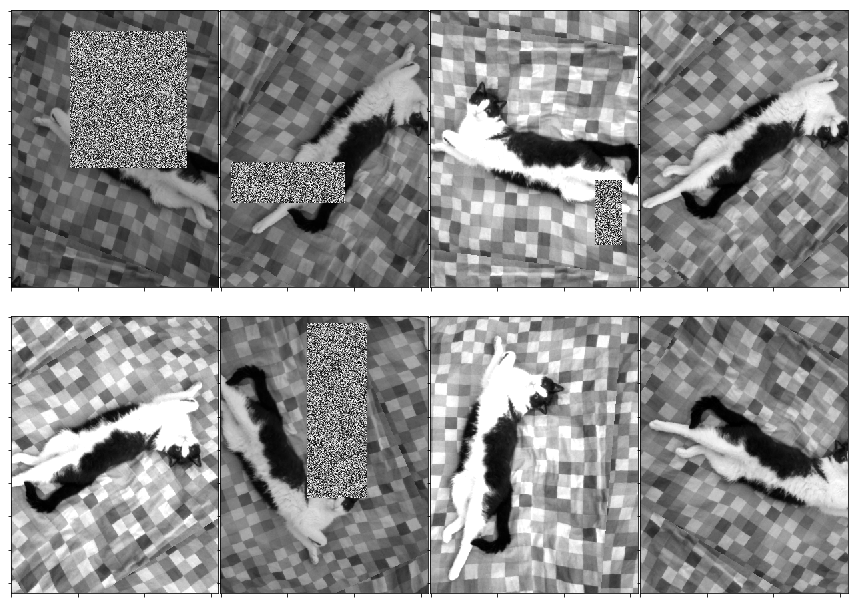

In [82]:
from numpy import expand_dims
from keras.preprocessing.image import load_img, save_img, img_to_array, ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from matplotlib.colors import NoNorm

img = load_img('koka.jpg', target_size=(koka.shape), color_mode = "grayscale")

data = img_to_array(img)
samples = expand_dims(data, 0)
samples = samples.astype('float32')

datagen = ImageDataGenerator() 
# augment_param = {'brightness_range':[0.2,2.2]} #DONE
# augment_param = {'zoom_range':[0.2,2.2]} #DONE
# augment_param = {'zoom_range':[0.2,0.8]} # cropping #DONE
# augment_param = {'rotation_range':135} #DONE
# augment_param = {'horizontal_flip':True}#DONE
# augment_param = {'vertical_flip':True} #DONE
# augment_param = {'width_shift_range':0.5} #DONE
# augment_param = {'height_shift_range':0.5} #DONE
augment_param = {'zca_whitening':True}
# augment_param = {'preprocessing_function':get_random_eraser(p=0.8, v_l=0, v_h=0.4, pixel_level=False)}
# https://arxiv.org/pdf/1708.04896.pdf

# elastic_transform(koka, alpha = koka.shape[1] * 3, sigma = koka.shape[1] * 0.07)

augment_param = {'brightness_range':[0.6,1.35],
                'zoom_range':[0.9,0.95],
                'rotation_range':85, 
                'vertical_flip':True,
                 'width_shift_range':0.2,
                'preprocessing_function':get_random_eraser(p=0.4,pixel_level=True),
                'fill_mode': 'wrap'}

# fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}.
datagen = ImageDataGenerator(**augment_param)
datagen.fit(samples)

iterator = datagen.flow(samples, batch_size=1)
pyplot.figure(figsize=(15.0,11.25))
pyplot.subplots_adjust(wspace = 0.01, hspace=0.001)

for i in range(8):
    if i >= 0:
        pyplot.subplot(240 + 1 + i)
        pyplot.gray()
        batch = iterator.next()
        image = batch[0].astype('float32')
        if image.shape[2] == 1:
            image = image[:, :, 0]
        pyplot.imshow(image)
        frame1 = pyplot.gca()
        frame1.axes.get_xaxis().set_ticklabels([])
        frame1.axes.get_yaxis().set_ticklabels([])

# pyplot.savefig('data_augmentation_results/'+str(*augment_param)+'_'+str(augment_param.values())+'.jpg')
pyplot.savefig('data_augmentation_results/multiple_1_wrap.jpg')
pyplot.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


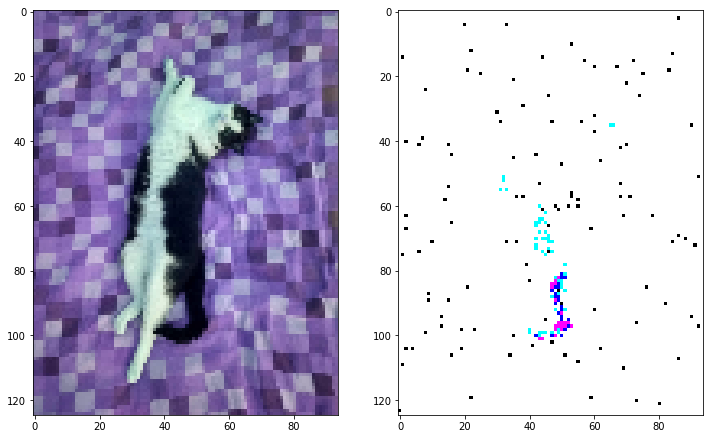

In [48]:
# koka = cv2.imread('koka.jpg', 0)

# koka = cv2.resize(koka, (0,0), fx=0.05, fy=0.05)
# koka = koka[:, :, :3]
# data = img_to_array(img)
# samples = expand_dims(data, 0)
# samples = samples.astype('float32')
# samples = np.array([samples], dtype = np.float32)
data = img_to_array(koka, 'channels_last')

s = expand_dims(data, 0)

def add_salt_pepper_noise(X_imgs):
    # Need to produce a copy as to not modify the original image
    X_imgs_copy = X_imgs.copy()
    row, col, _ = X_imgs_copy[0].shape
    salt_vs_pepper = 0.2
    amount = 0.004
    num_salt = np.ceil(amount * X_imgs_copy[0].size * salt_vs_pepper)
    num_pepper = np.ceil(amount * X_imgs_copy[0].size * (1.0 - salt_vs_pepper))
    
    for X_img in X_imgs_copy:
        # Add Salt noise
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in X_img.shape]
        X_img[coords[0], coords[1], :] = 1

        # Add Pepper noise
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in X_img.shape]
        X_img[coords[0], coords[1], :] = 0
    return X_imgs_copy
  
salt_pepper_noise_imgs = add_salt_pepper_noise(s)


fig, ax = plt.subplots(figsize = (12, 12))
plt.subplot(121)
plt.imshow(koka)
# plt.title('Original Image')
plt.subplot(122)
plt.imshow(salt_pepper_noise_imgs[0])
# plt.title('Different View of Image')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


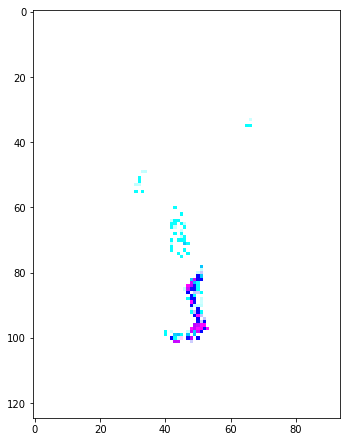

In [49]:
def add_gaussian_noise(X_imgs):
    gaussian_noise_imgs = []
    row, col, _ = X_imgs[0].shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    for X_img in X_imgs:
        gaussian = np.random.random((row, col, 1)).astype(np.float32)
        gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
        gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
        gaussian_noise_imgs.append(gaussian_img)
    gaussian_noise_imgs = np.array(gaussian_noise_imgs, dtype = np.float32)
    return gaussian_noise_imgs
  
gaussian_noise_imgs = add_gaussian_noise(s)

plt.imshow(gaussian_noise_imgs[0])
# plt.title('Different View of Image')
plt.show()

In [7]:
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    assert len(image.shape)==2
    print(alpha, sigma)

    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1))
    
    return map_coordinates(image, indices, order=1).reshape(shape)

In [8]:
koka = cv2.imread('koka.jpg', 0)
koka = cv2.resize(koka, (0,0), fx=0.1, fy=0.1)

koka_el_0_07 = elastic_transform(koka, alpha = koka.shape[1] * 0.1, sigma = koka.shape[1] * 0.01)
koka_el_3_0 = elastic_transform(koka, alpha = koka.shape[1] * 3, sigma = koka.shape[1] * 0.07)
koka_el_3_07 = elastic_transform(koka, alpha = koka.shape[1] * 30, sigma = koka.shape[1] * 0.1)

list_elastic_transform = [koka, koka_el_0_07, koka_el_3_0, koka_el_3_07]

31.200000000000003 3.12
936 21.840000000000003
9360 31.200000000000003


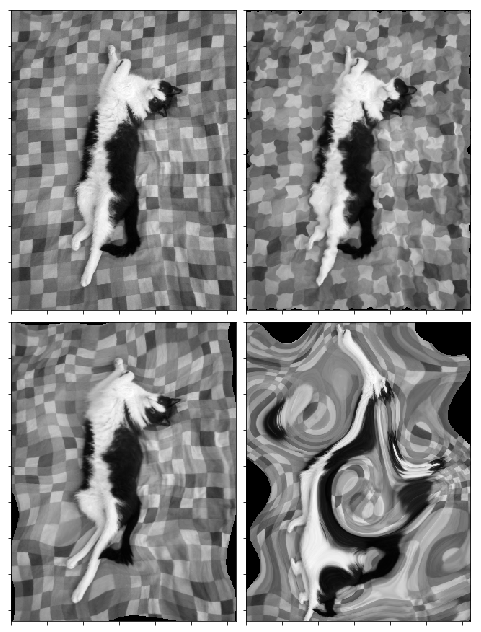

In [65]:
plt.figure(figsize=(15.0,11.25))
plt.subplots_adjust(wspace = 0.00001, hspace=0.04, right = 0.56)

for i in range(0, 4):
    plt.subplot(220 + 1 + i)
    plt.imshow(list_elastic_transform[i], cmap=plt.get_cmap('gray'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_ticklabels([])
    frame1.axes.get_yaxis().set_ticklabels([])
# show the plot
plt.savefig('data_augmentation_results/elastic_transform.jpg')
plt.show()


In [56]:
from skimage import exposure
def contrast_stretch(img, p1, p2):
    # Contrast stretching
    p2, p98 = np.percentile(img, (p1, p2))
    if (p2==p98):
        return img      # some images are just one color, so they gerenate an divide by zero error, so return original image
    img_contrast_stretch = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img_contrast_stretch

koka = cv2.imread('koka.jpg', 0)
koka = cv2.resize(koka, (0,0), fx=0.1, fy=0.1)

koka_2 = contrast_stretch(koka, 2.5, 97.5)
koka_3 = contrast_stretch(koka, 5, 95)
koka_4 = contrast_stretch(koka, 15, 85)

list_bright_transform = [koka, koka_2, koka_3, koka_4]

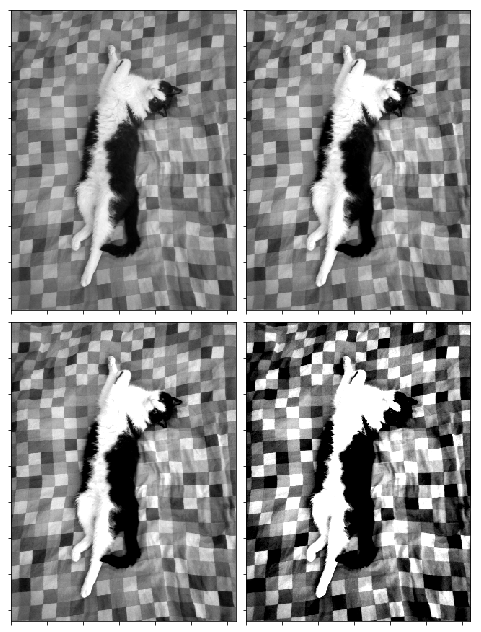

In [58]:
plt.figure(figsize=(15.0,11.25))
plt.subplots_adjust(wspace = 0.00001, hspace=0.04, right = 0.56)

for i in range(0, 4):
    plt.subplot(220 + 1 + i)
    plt.imshow(list_bright_transform[i], cmap=plt.get_cmap('gray'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_ticklabels([])
    frame1.axes.get_yaxis().set_ticklabels([])

plt.savefig('data_augmentation_results/contrast_transform.jpg')
plt.show()

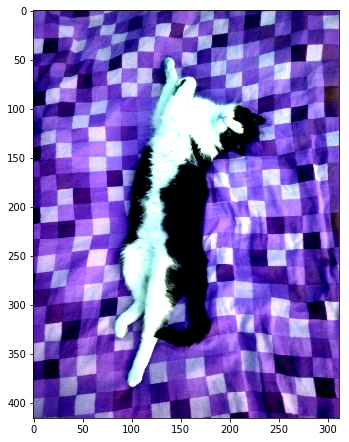

In [50]:
plt.imshow(contrast_stretch(koka), cmap="Greys")